In [76]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
from chewy_functions import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go
pd.set_option('display.max_colwidth', None)

# Get Links

In [22]:
url = "https://www.chewy.com/b/dry-food-294"
links = []

page = get(url, timeout=5, headers={"User-Agent": "SomeAgent 1.0"})
soup = BeautifulSoup(page.content, "html.parser")

In [23]:
# count number of results
result_count = soup.find(
    "p",
    {
        "class": "results-count kib-typography-paragraph1 kib-breakpoint-hide@xs kib-breakpoint-hide@sm ProductListingGrid_resultsCount__ovDYA"
    },
).text.split(" ")
card_count_start = int(result_count[0])
card_count_end = int(result_count[2])
prod_count = int(result_count[4])

print(f"Product cards on this page: {card_count_start} - {card_count_end}")

Product cards on this page: 1 - 36


In [24]:
# find all cards
cards = soup.find_all("a",class_="kib-product-title")

links = []

# get links from cards
for card in cards:
    if card['href'].startswith('https://www.chewy.com/'):
        print(card['href'])
        links.append(card['href'])

https://www.chewy.com/purina-pro-plan-high-protein-shredded/dp/52445
https://www.chewy.com/pedigree-complete-nutrition-grilled/dp/141433
https://www.chewy.com/purina-one-natural-smartblend-chicken/dp/29835
https://www.chewy.com/blue-buffalo-life-protection-formula/dp/28801
https://www.chewy.com/purina-pro-plan-adult-sensitive-skin/dp/52676
https://www.chewy.com/iams-proactive-health-minichunks/dp/29298
https://www.chewy.com/kibbles-n-bits-original-savory-beef/dp/161040
https://www.chewy.com/dog-chow-complete-adult-real-chicken/dp/127732
https://www.chewy.com/purina-one-natural-true-instinct-real/dp/119200
https://www.chewy.com/taste-wild-high-prairie-grain-free/dp/30075
https://www.chewy.com/hills-science-diet-adult-sensitive/dp/29963
https://www.chewy.com/purina-pro-plan-adult-shredded-blend/dp/52441
https://www.chewy.com/pedigree-complete-nutrition-roasted/dp/141435
https://www.chewy.com/rachael-ray-nutrish-real-beef-pea/dp/36742
https://www.chewy.com/diamond-naturals-lamb-meal-rice/

In [25]:
cards[0].get('href')

'https://chewy.ms.tagdelivery.com/click?id=d9136263-e43d-4662-a59f-43d1ec43acd0&x=YLURMjpIMPwRnmf2nvPpgXzGU6x5D4-C4SxmQAQBvqHxpIlDezENHLXeQ9jUBS07hZJuD8MQRdga3DMRF_1VJJ7eI64T_aIIXf_aCVzCOq9YgVGR2VYiawEGZ07Jy2N5aUH5q8iplsb6x8i6nd8OuYsWR16Y6UaUAkBxMeGidOWgViaqFaUQdKhQr6KU2V9gF_yP_w6fFqkeT3rHE-o1VQRFiHZ7HEmvPFGMzCVYJPYIwMuaxzptJhir4pun0JsFU_jS_qEbfx-4T8MC50-2eQWlTZNNvt9e9xdg58xPEGFMfGs5O7P7Y5horumHxPPwzjsxhNZDx6Dt75hl7p893BmzqtqZ4HXVWZy08XYfRF-vnkAnTiteB7Iiw8kKXn6zor6-B4BIhK9TP8EiPJnjY2-4xGTnDr4S7hwm-PIDN_EVYEjZtf9NbiTaLMM47Fs3np-jL4eD2IuO5-FpqfDJ-IG94muMSS5V_-hmNt4ZQtCMaGkhKYsDNc9j7O95hB_XyTxfJ9_G5mynncUKyh1zj_pxctqykhGLwojtaVI_X-2HBTlw42nmbayw-I4U94J5jdGUqlu24tFDYAqaIelTxvvO09ssS4pAVTRtvx0JpCPuTEwCh6MBIhixUZyad78Z&pos=0&redirect=https://www.chewy.com/royal-canin-size-health-nutrition/dp/35420?adId=d9136263-e43d-4662-a59f-43d1ec43acd0&adPayload=YLURMjpIMPwRnmf2nvPpgXzGU6x5D4-C4SxmQAQBvqHxpIlDezENHLXeQ9jUBS07hZJuD8MQRdga3DMRF_1VJJ7eI64T_aIIXf_aCVzCOq9YgVGR2VYiawEGZ07Jy2N5aUH5q8iplsb6x8i6n

In [26]:
# get href from each card
for card in cards:
    link = card.get('href')
    links.append(link)
    print("Added link: " + link + "\n")
    

links

Added link: https://chewy.ms.tagdelivery.com/click?id=d9136263-e43d-4662-a59f-43d1ec43acd0&x=YLURMjpIMPwRnmf2nvPpgXzGU6x5D4-C4SxmQAQBvqHxpIlDezENHLXeQ9jUBS07hZJuD8MQRdga3DMRF_1VJJ7eI64T_aIIXf_aCVzCOq9YgVGR2VYiawEGZ07Jy2N5aUH5q8iplsb6x8i6nd8OuYsWR16Y6UaUAkBxMeGidOWgViaqFaUQdKhQr6KU2V9gF_yP_w6fFqkeT3rHE-o1VQRFiHZ7HEmvPFGMzCVYJPYIwMuaxzptJhir4pun0JsFU_jS_qEbfx-4T8MC50-2eQWlTZNNvt9e9xdg58xPEGFMfGs5O7P7Y5horumHxPPwzjsxhNZDx6Dt75hl7p893BmzqtqZ4HXVWZy08XYfRF-vnkAnTiteB7Iiw8kKXn6zor6-B4BIhK9TP8EiPJnjY2-4xGTnDr4S7hwm-PIDN_EVYEjZtf9NbiTaLMM47Fs3np-jL4eD2IuO5-FpqfDJ-IG94muMSS5V_-hmNt4ZQtCMaGkhKYsDNc9j7O95hB_XyTxfJ9_G5mynncUKyh1zj_pxctqykhGLwojtaVI_X-2HBTlw42nmbayw-I4U94J5jdGUqlu24tFDYAqaIelTxvvO09ssS4pAVTRtvx0JpCPuTEwCh6MBIhixUZyad78Z&pos=0&redirect=https://www.chewy.com/royal-canin-size-health-nutrition/dp/35420?adId=d9136263-e43d-4662-a59f-43d1ec43acd0&adPayload=YLURMjpIMPwRnmf2nvPpgXzGU6x5D4-C4SxmQAQBvqHxpIlDezENHLXeQ9jUBS07hZJuD8MQRdga3DMRF_1VJJ7eI64T_aIIXf_aCVzCOq9YgVGR2VYiawEGZ07Jy2N5aUH5q8

['https://www.chewy.com/purina-pro-plan-high-protein-shredded/dp/52445',
 'https://www.chewy.com/pedigree-complete-nutrition-grilled/dp/141433',
 'https://www.chewy.com/purina-one-natural-smartblend-chicken/dp/29835',
 'https://www.chewy.com/blue-buffalo-life-protection-formula/dp/28801',
 'https://www.chewy.com/purina-pro-plan-adult-sensitive-skin/dp/52676',
 'https://www.chewy.com/iams-proactive-health-minichunks/dp/29298',
 'https://www.chewy.com/kibbles-n-bits-original-savory-beef/dp/161040',
 'https://www.chewy.com/dog-chow-complete-adult-real-chicken/dp/127732',
 'https://www.chewy.com/purina-one-natural-true-instinct-real/dp/119200',
 'https://www.chewy.com/taste-wild-high-prairie-grain-free/dp/30075',
 'https://www.chewy.com/hills-science-diet-adult-sensitive/dp/29963',
 'https://www.chewy.com/purina-pro-plan-adult-shredded-blend/dp/52441',
 'https://www.chewy.com/pedigree-complete-nutrition-roasted/dp/141435',
 'https://www.chewy.com/rachael-ray-nutrish-real-beef-pea/dp/36742'

In [ ]:
# get links from chewy.com dry food page
url = "https://www.chewy.com/b/dry-food-294"
links = []

get_links(url, links)

# Scrape Pages

In [2]:
# read in links from chewyLinks_9-21.txt
load_links('chewy_links_9-21.txt')
prod_links

['https://www.chewy.com/purina-pro-plan-high-protein-shredded/dp/52445',
 'https://www.chewy.com/pedigree-complete-nutrition-grilled/dp/141433',
 'https://www.chewy.com/purina-one-natural-smartblend-chicken/dp/29835',
 'https://www.chewy.com/blue-buffalo-life-protection-formula/dp/28801',
 'https://www.chewy.com/purina-pro-plan-adult-sensitive-skin/dp/52676',
 'https://www.chewy.com/iams-proactive-health-minichunks/dp/29298',
 'https://www.chewy.com/kibbles-n-bits-original-savory-beef/dp/161040',
 'https://www.chewy.com/dog-chow-complete-adult-real-chicken/dp/127732',
 'https://www.chewy.com/purina-one-natural-true-instinct-real/dp/119200',
 'https://www.chewy.com/taste-wild-high-prairie-grain-free/dp/30075',
 'https://www.chewy.com/hills-science-diet-adult-sensitive/dp/29963',
 'https://www.chewy.com/purina-pro-plan-adult-shredded-blend/dp/52441',
 'https://www.chewy.com/pedigree-complete-nutrition-roasted/dp/141435',
 'https://www.chewy.com/rachael-ray-nutrish-real-beef-pea/dp/36742'

In [15]:
# use requests to get html from first link

links = prod_links

# first item in list
link = links[0]

# # try to get response from link
page = requests.get(
            link.rstrip(), timeout=5, headers={"User-Agent": "SomeAgent 1.0"}
        )

In [16]:
# get html from response
soup = BeautifulSoup(page.content, "html.parser")

In [17]:
type(soup)

bs4.BeautifulSoup

In [18]:
# find product name
prod_name = soup.find('div', class_='styles_root__jNMr3').find('h1').text

prod_name

'Purina Pro Plan High Protein Shredded Blend Chicken & Rice Formula with Probiotics Dry Dog Food'

In [19]:
# find specifications table
specifications = soup.find('div', class_='styles_infoGroupSectionTitle__cyv_p').find_next_sibling('div').find('table').find_all('tr') 

# define dictionary
specifications_dict = {}

# create dictionary of specifications
for i in range(0, len(specifications)):
    specifications_dict[specifications[i].find("th").text] = (
        specifications[i].find("td").text
    )
prod_dict[specifications_dict["Item Number"]] = specifications_dict
specifications_dict["name"] = prod_name

specifications_dict

{'Item Number': '67510',
 'Weight': '6 pounds',
 'Season': 'N/A',
 'Sourced From': 'Various',
 'Made In': 'United States',
 'Lifestage': 'Adult',
 'Breed Size': 'Small Breeds, Medium Breeds, Large Breeds, All Breeds',
 'Food Form': 'Dry Food',
 'Special Diet': 'High-Protein, High Fiber, With Grain',
 'name': 'Purina Pro Plan High Protein Shredded Blend Chicken & Rice Formula with Probiotics Dry Dog Food'}

In [8]:
# use scrape_pages on all links 
scrape_pages(prod_links)

#runtime: 43m 5.7s for 2021 links

Trying: https://www.chewy.com/purina-pro-plan-high-protein-shredded/dp/52445
Got Page

Purina Pro Plan High Protein Shredded Blend Chicken & Rice Formula with Probiotics Dry Dog Food
Trying: https://www.chewy.com/pedigree-complete-nutrition-grilled/dp/141433
Got Page

Pedigree Complete Nutrition Grilled Steak & Vegetable Flavor Dog Kibble Adult Dry Dog Food
Trying: https://www.chewy.com/purina-one-natural-smartblend-chicken/dp/29835
Got Page

Purina ONE Natural SmartBlend Chicken & Rice Formula Dry Dog Food
Trying: https://www.chewy.com/blue-buffalo-life-protection-formula/dp/28801
Got Page

Blue Buffalo Life Protection Formula Adult Chicken & Brown Rice Recipe Dry Dog Food
Trying: https://www.chewy.com/purina-pro-plan-adult-sensitive-skin/dp/52676
Got Page

Purina Pro Plan Adult Sensitive Skin & Stomach Salmon & Rice Formula Dry Dog Food
Trying: https://www.chewy.com/iams-proactive-health-minichunks/dp/29298
Got Page

Iams Proactive Health MiniChunks Small Kibble Adult Chicken & Whole

In [20]:
# convert prod_dict to dataframe
df = pd.DataFrame.from_dict(prod_dict, orient='index')

In [13]:
df

,Item Number,Weight,Season,Sourced From,Made In,Lifestage,Breed Size,Food Form,Special Diet,name,...,Dog Breed,Grooming Feature,Health Condition,NASC Certified,Age Requirement,Restricted Availability,Toy Feature,Toy Flavor,Material,Farm Animal Type
67510,67510,6 pounds,N/A,Various,United States,Adult,"Small Breeds, Medium Breeds, Large Breeds, All Breeds",Dry Food,"High-Protein, High Fiber, With Grain",Purina Pro Plan High Protein Shredded Blend Chicken & Rice Formula with Probiotics Dry Dog Food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
756422,756422,NaN,N/A,Various,United States,Adult,"Small Breeds, Medium Breeds, Large Breeds, All Breeds",Dry Food,With Grain,Pedigree Complete Nutrition Grilled Steak & Vegetable Flavor Dog Kibble Adult Dry Dog Food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57182,57182,16.5 pounds,N/A,Various,United States,Adult,"Small Breeds, Medium Breeds, Large Breeds, All Breeds",Dry Food,"High-Protein, Natural, With Grain",Purina ONE Natural SmartBlend Chicken & Rice Formula Dry Dog Food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46860,46860,15 pounds,N/A,Various,"N/A, United States",Adult,"Small Breeds, Medium Breeds, Large Breeds, All Breeds",Dry Food,"No Corn No Wheat No Soy, With Grain, Natural",Blue Buffalo Life Protection Formula Adult Chicken & Brown Rice Recipe Dry Dog Food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101143,101143,30 pounds,N/A,Various,United States,Adult,"Small Breeds, Medium Breeds, Large Breeds, All Breeds",Dry Food,"High-Protein, Sensitive Digestion, Weight Control, No Corn No Wheat No Soy, With Grain",Purina Pro Plan Adult Sensitive Skin & Stomach Salmon & Rice Formula Dry Dog Food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344090,344090,40 pounds,NaN,United States,United States,Adult,"All Breeds, Small Breeds, Medium Breeds, Large Breeds",Dry Food,"Grain-Free, No Corn No Wheat No Soy","Sportsman's Pride Field Master 30/20 High-Protein Dry Dog Food, 40-lb bag",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79882,79882,13 pounds,N/A,United States,United States,Adult,"Small Breeds, Medium Breeds, Large Breeds, All Breeds",Dry Food,"Grain-Free, Gluten Free, No Corn No Wheat No Soy",Evolve Deboned Grain-Free Turkey & Sweet Potato Recipe Dry Dog Food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79866,79866,30 pounds,N/A,United States,United States,Adult,"Small Breeds, Medium Breeds, Large Breeds, All Breeds",Dry Food,"No Corn No Wheat No Soy, With Grain",Evolve Classic Deboned Chicken & Brown Rice Recipe Dry Dog Food,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134451,134451,24 pounds,N/A,Various,United States,Adult,"Small Breeds, Medium Breeds, Large Breeds, All Breeds",Dry Food,"Sensitive Digestion, Weight Control, Grain-Free, Gluten Free, Low Fat, Natural","Holistic Select Weight Management Chicken Meal & Peas Recipe Dry Dog Food, 24-lb bag",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# save dataframe to csv
df.to_csv('chewy_data_9-22.csv')

# Explore Data

In [28]:
# df shape
df.shape

(2021, 32)

In [29]:
df.columns

Index(['Item Number', 'Weight', 'Season', 'Sourced From', 'Made In',
       'Lifestage', 'Breed Size', 'Food Form', 'Special Diet', 'name',
       'Ingredients', 'Reccomendation Rate', 'Rating', 'Review Count',
       'Shop Conscious', 'Packaging Type', 'Food Texture', 'Dimensions',
       'Test Type', 'Administration Form', 'Product Form', 'Drug Type',
       'Dog Breed', 'Grooming Feature', 'Health Condition', 'NASC Certified',
       'Age Requirement', 'Restricted Availability', 'Toy Feature',
       'Toy Flavor', 'Material', 'Farm Animal Type'],
      dtype='object')

In [49]:
# life stage
df['Lifestage'].value_counts()

Lifestage
Adult             1579
Puppy              257
Senior             111
All Lifestages      32
Adult, Senior        1
Adult, Puppy         1
Name: count, dtype: int64

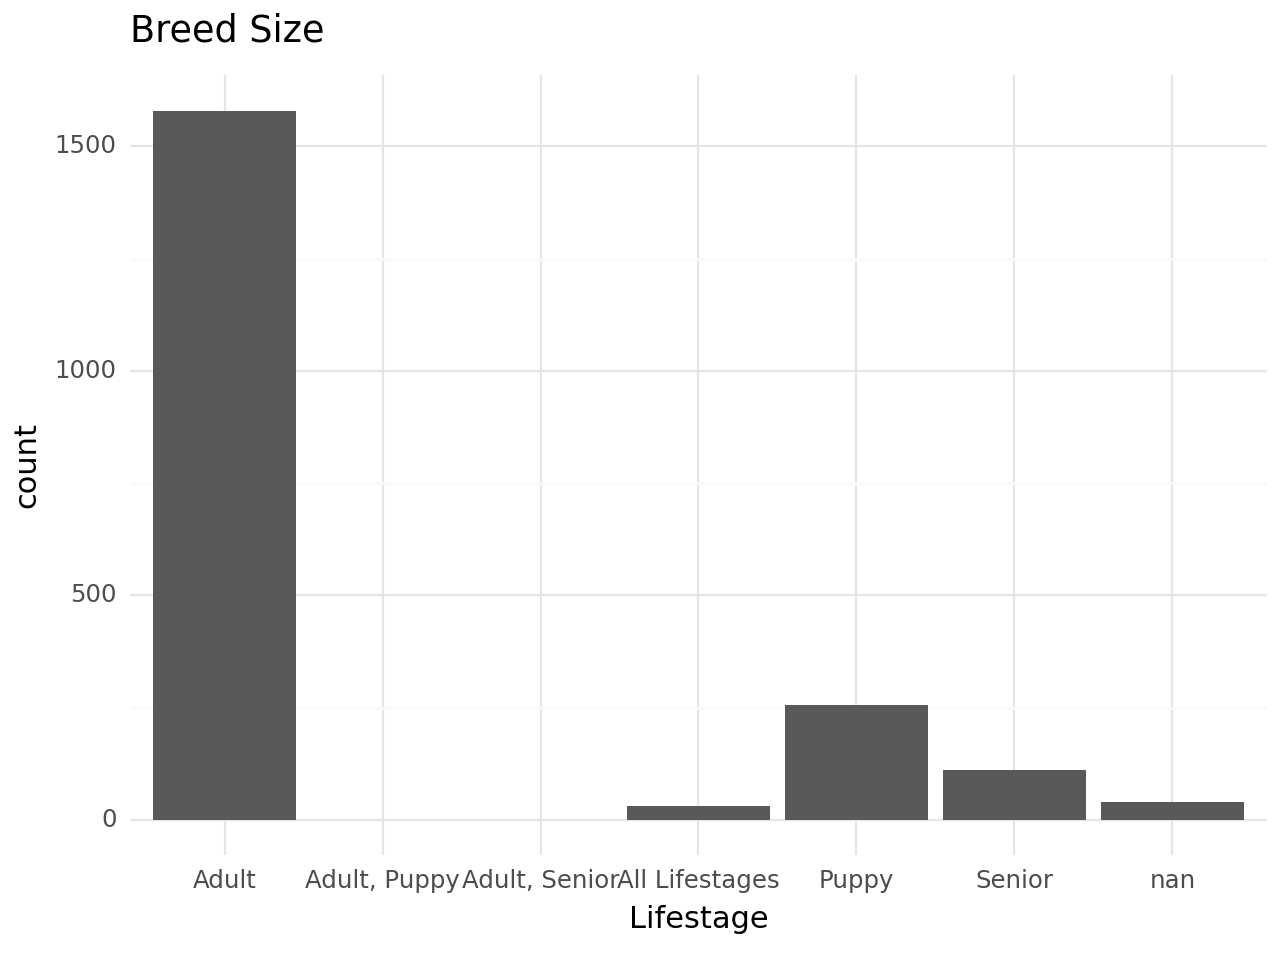

<Figure Size: (640 x 480)>

In [66]:
# plotnine bar chart of lifestage value counts
p = ggplot(df, aes(x='Lifestage')) + geom_bar() + theme_minimal() + labs(title='Lifestage')

fig = go.Figure

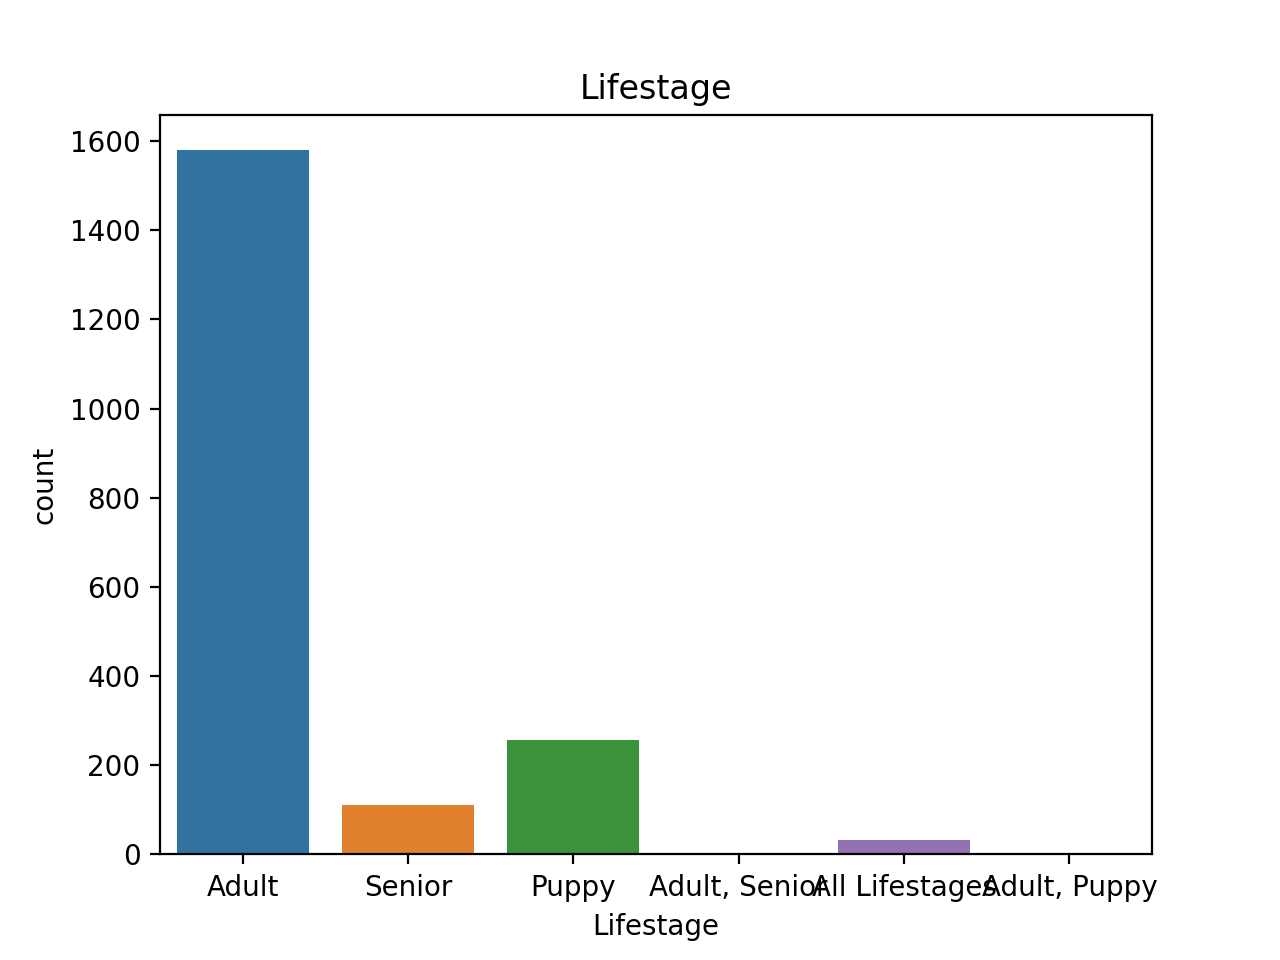

In [85]:
# seaborn bar chart of lifestage value counts
sns.countplot(x='Lifestage', data=df)

# add title
plt.title('Lifestage')

plt.show()